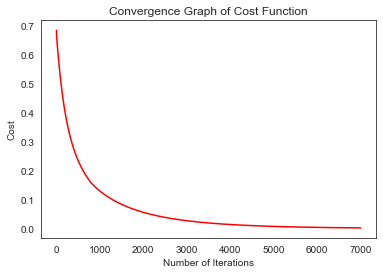

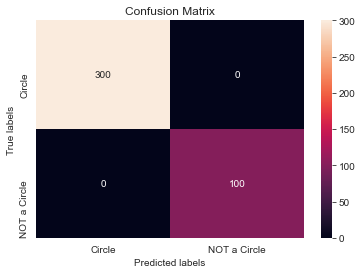


***************************************************************************************
********************     Model training sucessfully completed      ********************
***************************************************************************************

 The model classes are: [0 1]

 The model confusion matrix is:
[[300   0]
 [  0 100]]

 The model score is: 1.0

=============     Please find feature vectors and labels in DATASET.csv      ============= 

=============     Please find model coefficients in COEFFICIENTS.csv         ============= 

=============     Time for training 400 images :30.09 seconds                =============

=============     Please find sample evaluations in RESULTS_X.csv            ============= 

=============     Please find SUMMARY of results below                       ============= 

CIRCLE was DETECTED in Sample 1
CIRCLE was DETECTED in Sample 2
CIRCLE was DETECTED in Sample 3
CIRCLE was DETECTED in Sample 4
CIRCLE was DETECTED in Sample

In [1]:
##############################################################################################
#########################           PROJECT GROUP 1         ##################################
##############################################################################################

# Project Tittle  => Circle detection
# Members         => Almir, Dharshini, Sayar

##############################################################################################
#                       Part 1 - Creating & Pre-processing the Dataset                       #
##############################################################################################

#NOTES:

# all dataset images should be in JPG format
# images with CIRCLES should be named sequentially as "YES1", "YES2", "YES3"...etc
# images withOUT circles should be named similarly as "OTHER1", "OTHER2", "OTHER3"...etc
# the images to be tested should be named as "sample1","sample2", "sample3",...etc

# the images should be stored in 3 different folders as below:
    # 1 folder for images WITH circles
    # 1 folder for images withOUT circles
    # 1 folder for sample images to be classified

#Please declare paths below
path1='D:\Circle_YES'                               #Path of the folder of images with circles
path2='D:\Circle_NO'                                #Path of the folder of images without circles
path3='D:\TEST'                                     #Path of the folder with ONE image to be tested    

# Importing the necessary libraries
from PIL import Image
import numpy as np
from numpy import linalg
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

then = time.time()

#declaring variables
norm_size=64                                            #size for the images to be normalized
Ncircles=300                                         #number of images with circles in the dataset
Nothers=100                                          #number of images without circles in the dataset
Nsamples=10                                         #number of samples to be tested

x1=np.empty([1,norm_size**2])                          #for storing line norm_size
y=np.empty(Ncircles+Nothers)                        #for storing labels (0 or 1)

#same as above for the sample image
x1sample=np.empty([1,norm_size**2])
ysample=np.empty(Ncircles+Nothers)

#Loop into the dataset images (with circles and without circles)
i=1

while i <= Ncircles+Nothers:

    if i<=Ncircles:                                               #preparing images with circles
        picture_in=path1+'/YES'+str(i)+'.jpg'                     #name of each image with circle in the dataset YES
        picture_out=path1+'/YES'+str(i)+'_gray.jpg'               #name which the images with circles converted in grayscale will be saved
    else:                                                         #preparing images withOUT circles
        picture_in=path2+'/OTHER'+str(i-Ncircles)+'.jpg'          #name of each image with circle in the dataset NO
        picture_out=path2+'/OTHER'+str(i-Ncircles)+'_gray.jpg'    #name which the images with circles converted in grayscale will be saved

    img = Image.open(picture_in).convert('L')                     #loading & converting image into grayscale one
    resizedImage = img.resize((norm_size, norm_size))                   #resizing images in square shape
    #resizedImage.save(picture_out)  
  
    arraydata = np.asarray(resizedImage)                          #converting image into numpy array
  
    #vectorizing images and obtaining feature vectors
    counter=0
    ii=0
    while ii < norm_size:                              #loop in the lines of array
        j=0
        while j<norm_size:                             #loop in the columns of the array
            x1[0,counter]=arraydata[ii,j]               #populating x1 vector with values of the LINES from image array
            j=j+1
            counter=counter+1
        ii=ii+1
    x=x1

    if i==1:                                        #building the feature vector array
        xt=x                                        #first image of the dataset
    else:
        xt=np.append(xt,x,axis=0)                   #adding other images
    i=i+1                                           #moving to the next image

array2 = np.full(Ncircles,0)                        #labeling images WITH circles as 0
array3 = np.full(Nothers,1)                         #labeling images WITHOUT circles as 1
y=np.append(array2,array3)                          #combining all labels in a single vector Y

list=np.arange(1,Ncircles+Nothers+1)
dataset = np.insert(xt, norm_size**2, y, axis=1)
dataset = np.insert(dataset, 0, list, axis=1)

np.savetxt('DATASET.csv', dataset, fmt='%10.0f',delimiter='') 

##############################################################################################
#                       Part 2 - Creating & Training the ML Models                           #
##############################################################################################

#Defining the class for LogisticRegression

class LogisticRegression_Implemented():                                 #new class for logistic regression, "self" for using inside class
    def __init__(self):                                 
        self.w = None
        self.classes = None
    
    def sigmoid(self,x):                                                #sigmoid funcion for using cross entropy as activation function 
        return 1 / (1 + np.exp(-x))

    def compute_cost(self, X, y, w):
        m = len(y)
        h=self.sigmoid(X @ w)
        cost = (-1/m)*(((y).T @ np.log(h))+((1-y).T @ np.log(1-h)))
        return cost

    def gradient_descent(self, X, y, w, alpha, iterations):
        m = len(y)	
        cost_history = np.zeros((iterations,1))
                
        for i in range(iterations):
            grad_eval= (1/m) * (X.T @ (self.sigmoid(X @ w) - y))        #calculating the gradient
            norm_grad=linalg.norm(grad_eval)                            #normalizing gradient
            w = w - (alpha)*(grad_eval/(norm_grad))                       #gradient descent 
            cost_history[i] = self.compute_cost(X, y, w)  
        return w, cost_history

    def plot_history(self,history):
        plt.figure()
        sns.set_style('white')
        plt.plot(range(len(history)), history, 'r')
        plt.title("Convergence Graph of Cost Function")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost")
        plt.show()

    def fit_implemented(self, X, Y, iterations = 7000, alpha = 0.00001,plot_history = True):   #receives feature vectors, labels, w vector, number of iterations
        P = len(Y)                                                                              #number of samples equal to the total number of labels 
        Y = Y.reshape((P,1))                                                                    #reshaping for manipulating the arrays

        n = np.size(X,1)                                                                        #getting size of feature vectors
        w = np.zeros((n,1))                                                                     #starting first w vector with zeros and same size as feature vectors

        w_optimal, history = self.gradient_descent(X, Y, w, alpha, iterations)                  #calling gradient descent function 
        self.w = w_optimal
        self.classes = np.unique(y)                                                             #getting values from vector y [0 or 1]

        if plot_history:
            self.plot_history(history)        
                
        return w_optimal                                                                         #returning optimum w vector after number of iterations

    def predict_implemented(self, X):                                   #for predicting Y values, receives vector
        w = self.w
        return np.round(self.sigmoid(X @ w))                            #estimate y and round values to be 0 or 1
        
    def score_implemented(self,X,Y):                                    #calculate the model score
        P = len(Y)                                                      #number of dataset samples
        Y = Y.reshape((P,1))
        predictions = self.predict_implemented(X)                       #calling predict_implemented function                      
        return np.sum(Y == predictions)/P                               #
                
    def predict_proba_implemented(self, X):
        w = self.w
        predict_prob_B = self.sigmoid(X @ w)[0][0]
        predict_prob_A = 1 - predict_prob_B
        return [predict_prob_A,predict_prob_B]

# training model
log_regress=LogisticRegression_Implemented()
w_opt=log_regress.fit_implemented(xt, y, iterations = 7000, alpha = 0.00001)
y_pred=log_regress.predict_implemented(xt)
confMatrix = confusion_matrix(y, y_pred)
now = time.time()

# labels, title and ticks
ax= plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt='.0f',ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Circle', 'NOT a Circle']);ax.yaxis.set_ticklabels(['Circle', 'NOT a Circle'])
plt.show()

print()
print('***************************************************************************************')
print('********************     Model training sucessfully completed      ********************')
print('***************************************************************************************')
print()
print(' The model classes are:',log_regress.classes)
print()
print(' The model confusion matrix is:')
print(confMatrix)
print()
print(' The model score is:',log_regress.score_implemented(xt,y))

np.savetxt('COEFFICIENTS.csv',w_opt, fmt='%10.7f',delimiter='') 

##############################################################################################
#                       Part 3 - Post-processing test data                                   #
##############################################################################################

def testing(sample_in,sample_out):

    #Segmenting the test image in smaller images
    sample = Image.open(sample_in).convert('L')   

    width, height = sample.size
    average_size=(width+height)/2

    if (average_size % 2)==0:
        new_size=average_size
    else:    
        new_size=average_size+1

    #assumption that the circle radius is 25% of the image width as instructed in project description
    circle_diameter=0.5*int(new_size)

    resizedImage = sample.resize((int(new_size), int(new_size)))
    resizedImage.save(sample_out+'_0.jpg')

    #loop for segmenting images, overlapping to avoid missing circles
    step_size=circle_diameter/5
                       
    counter=1
    top=0

    while top < int(new_size)-circle_diameter:    
    
        right=0

        while right < int(new_size)-circle_diameter:
            
            resizedImage = sample.resize((int(new_size), int(new_size)))

            #img_res = resizedImage.crop((left, top, right, bottom))  
            img_res = resizedImage.crop((right, top, right+circle_diameter, top+circle_diameter))  

            img_res.save(sample_out+'_'+str(counter)+'.jpg')   

            counter=counter+1
            right=right+step_size

        top=top+step_size

    #Checking smaller pieces of images individually
    ################################################
        
    #loop in each segmented image
    n_images=counter

    #declaring array for storaging results
    results=np.empty([n_images,4],dtype=object)
    results[0,0]='TEST SAMPLE'
    results[0,1]='PREDICTION'
    results[0,2]='PREDICTED LABLE'
    results[0,3]='PROBABILITIES'

    kk=0

    while kk <=n_images-2:

        # pre-processing sample image in the same way used for the dataset                                                    
        sample = Image.open(sample_out+'_'+str(kk)+'.jpg')            
        resizedSample = sample.resize((norm_size, norm_size))                                 

        sample_array = np.asarray(resizedSample)                

        counter=0                                       
        ii=0                                            
        while ii < norm_size:                                      
            j=0
            while j<norm_size:                                     
                x1sample[0,counter]=sample_array[ii,j]                   
                j=j+1                                   
                counter=counter+1                       
            ii=ii+1                                     
                                    
            xsample=x1sample
            
        if log_regress.predict_implemented(xsample)[0][0]==0:
            test='Circle DETECTED'
            #resizedSample.save(sample_out+'_'+str(kk)+'_detected.jpg')
        else:
            test='Circle NOT DETECTED'
            #resizedSample.save(sample_out+'_'+str(kk)+'_NOT_detected.jpg')

        pred_label=log_regress.predict_implemented(xsample)[0][0]
        probabilities=log_regress.predict_proba_implemented(xsample)
        
        if kk==0:
            results[kk+1,0]='ORIGINAL_IMAGE'+'_'+str(kk)
        else:
            results[kk+1,0]='segmented_image'+'_'+str(kk)

        results[kk+1,1]=str(test)
        results[kk+1,2]=int(pred_label)
        results[kk+1,3]=probabilities        

        if pred_label==0:       
            break
        
        kk=kk+1

    if results[1,2]==0:
        print('CIRCLE was DETECTED in Sample '+str(iii))
    else:
        print('CIRCLE was NOT detected in Sample '+str(iii))

    np.savetxt('RESULTS_'+str(iii)+'.csv', results, fmt='%s',delimiter=';')
    return results

print()
print("=============     Please find feature vectors and labels in DATASET.csv      ============= ")
print()
print("=============     Please find model coefficients in COEFFICIENTS.csv         ============= ")
print()
print('=============     Time for training '+str(Ncircles+Nothers)+' images :' '%5.2f'%(now-then)+' seconds                =============')
print()
print("=============     Please find sample evaluations in RESULTS_X.csv            ============= ")
print()
print("=============     Please find SUMMARY of results below                       ============= ")
print()

iii=1
while iii<=Nsamples:
    testing(path3+'/sample'+str(iii)+'.jpg',path3+'/sample_gray'+str(iii))
    iii=iii+1

print()
print('***************************************************************************************')
print('********************                 END OF RUN                    ********************')
print('***************************************************************************************')
print()
